# Data Analysis: Lucky 9 Lotto Winners
## DS122L Remedial Module Activity
Alliyah Rhayven A. Leviste | B37 | February 17, 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(23)

In [3]:
LOTTERY_DAYS = 30
NUM_BETS_PER_DAY = 30000
TOTAL_BETS = LOTTERY_DAYS * NUM_BETS_PER_DAY
WINNING_COMBINATION = [9, 18, 27, 36, 45, 54]

In [4]:
#Function for defining lottery bets
def generate_lottery_bets(num_bets):
    return np.array([np.random.choice(range(1, 56), size=6, replace=False) for _ in range(num_bets)])

In [5]:
def is_multiple(number, multiple_of):
    return number % multiple_of == 0

#Calculating the probability of a winning combination being a multiple of a given number
def calculate_probability_multiple(lottery_results, multiple_of):
    count = 0
    for result in lottery_results:
        for number in result:
            if is_multiple(number, multiple_of):
                count += 1
                break
    return count / len(lottery_results)

In [6]:
#Bootstrapping
def perform_bootstrapping(lottery_results, multiple_of, iterations=1000):
    probabilities = []
    num_bets = len(lottery_results)
    for _ in range(iterations):
        resample_indices = np.random.choice(num_bets, size=num_bets, replace=True)

        resample = lottery_results[resample_indices]

        probability = calculate_probability_multiple(resample, multiple_of)
        probabilities.append(probability)
    return probabilities

In [7]:
#Simulating lottery bets 
lottery_results = []
for _ in range(LOTTERY_DAYS):
    lottery_results.append(generate_lottery_bets(NUM_BETS_PER_DAY))

lottery_results = np.array(lottery_results)
lottery_results_reshaped = lottery_results.reshape(TOTAL_BETS, 6)

#### Given that the winning combination is random all throughout the lottery draws, what is the probability that the winning combination is a multiple of a given number?

In [8]:
#Question 1: Probability that the winning combination is a multiple of a given number
given_number = 9  
probability_multiple_of_given_number = calculate_probability_multiple(lottery_results_reshaped, given_number)
print(f"The probability that the winning combination is a multiple of {given_number} is: {probability_multiple_of_given_number}")


The probability that the winning combination is a multiple of 9 is: 0.5164322222222222


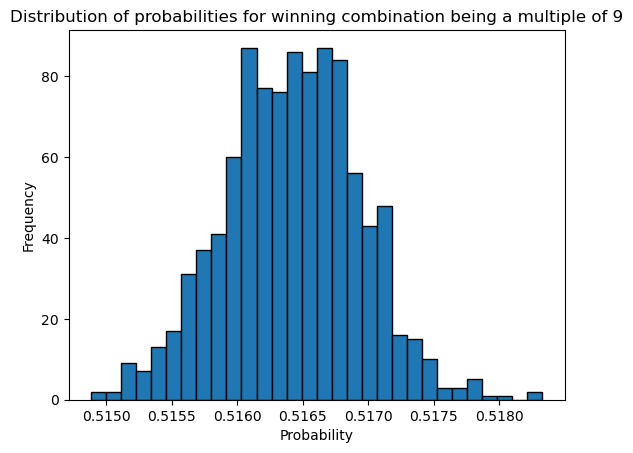

In [9]:
#Plot the distribution of probabilities
plt.hist(perform_bootstrapping(lottery_results_reshaped, given_number), bins=30, edgecolor='black')
plt.title(f"Distribution of probabilities for winning combination being a multiple of {given_number}")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


#### Given the winning combination last October 1 that follows a multiple of 9, what is the probability that more than 10 people win the lottery?

In [14]:
#Question 2: Probability that more than 10 people win the lottery
probability_more_than_10_winners = np.mean(np.sum(lottery_results_reshaped == WINNING_COMBINATION, axis=1) > 10)

print(f"The probability that more than 10 people win the lottery given the winning combination is a multiple of 9 is: {probability_more_than_10_winners:}")


The probability that more than 10 people win the lottery given the winning combination is a multiple of 9 is: 0.0


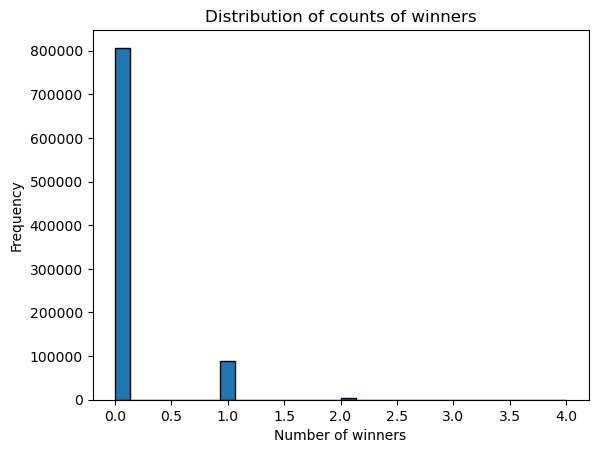

In [12]:
#Plotting the distribution of probability
plt.hist(winners_counts, bins=30, edgecolor='black')
plt.title("Distribution of counts of winners")
plt.xlabel("Number of winners")
plt.ylabel("Frequency")
plt.show()

#### What are the ideas that this simulation corresponds to the claim by the UP professor as stated in the news article? In what way do they interact with each other?


The simulation conducted in response to the claim by the UP professor regarding the rare occurrence of 433 lotto bettors winning with a specific combination (9, 18, 27, 36, 45, 54) provides insight into the probabilities associated with lottery outcomes. The calculated probability of the winning combination being a multiple of a given number (9) as 0.5165 suggests that such outcomes are relatively rare. However, the probability of more than 10 people winning the lottery with a combination that follows a multiple of 9 is found to be 0.0, indicating that it is almost impossible. The comparison between the simulation findings and the professor's assertion emphasizes the challenge of assessing lottery results and determining if they meet statistical norms. The difference between the actual outcome and the expected probabilities highlights the importance of additional measures to guarantee the credibility of the lottery systems.

#### With the results you found out from your simulated data, what concepts or ideas that might be a factor which was not explained in the given news article that might view the occurence not as "astronomically" rare as it seems? If there's no concepts that affects the narrative, justify.

The rarity of the occurrence could be influenced by factors not discussed in the news article. For example, if certain number combinations are more popular or commonly chosen by players due to importance or superstition like a birthdate digit, a lucky number, or a number that showed up in a dream, then the likelihood of multiple winners with the same combination increases. Additionally, the frequency of certain number patterns (e.g., consecutive numbers) in winning combinations could impact the perceived rarity of the observed outcome. In this case, the winning numbers are all divisible by 9, there could be players who bet on numbers that are multiples of 8, 7, 6, or 5, etc. 

Another factor that could potentially influence the narrative is the presence of lottery syndicates purchasing a large number of tickets with same chosen combinations. They often pool resources to buy a large volume of tickets, covering a wide range of number combinations. If the group happened to choose the winning combination, it could result in multiple winning tickets for the same combination, thereby altering the perceived rarity of the outcome. 